<h1>Experiment with std1pos</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
basedir = '/home/joewandy/git/metabolomics_tools'
sys.path.append(basedir)

In [3]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

import cPickle
import random
import copy
import glob
import gzip

/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
from alignment.models import HyperPars as AlignmentHyperPars
from alignment.experiment import *

<h2>Experiment Parameters</h2>

Set up all the experiment parameters

In [5]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/std1_csv_full_old'
transformation_file = '/home/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'
gt_file = '/home/joewandy/git/metabolomics_tools/alignment/input/std1_csv_full_old/ground_truth/ground_truth.txt'

In [6]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 5
hp.within_file_rt_tol = 30
hp.across_file_mass_tol = 10
hp.across_file_rt_tol = 60
hp.alpha_mass = 1.0
hp.dp_alpha = 1000.0
hp.beta = 0.1
hp.t = 0.0
hp.mass_clustering_n_iterations = 200
hp.rt_clustering_nsamps = 100
hp.rt_clustering_burnin = 0

print hp

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=60, alpha_mass=1.0, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=200, matching_alpha=0.3, rt_clustering_burnin=0, rt_clustering_nsamps=100, t=0.0, within_file_mass_tol=5, within_file_rt_tol=30


In [7]:
evaluation_method = 2
n_iter = 30

In [8]:
param_list = []
for mass_tol in range(2, 11, 2):
    for rt_tol in range(5, 101, 5):
        param_list.append((mass_tol, rt_tol))

In [9]:
param_list_mwg = []
for mass_tol in range(2, 11, 2):
    for rt_tol in range(5, 101, 5):
        for group_tol in range(2, 11, 2):
            for alpha in range(0, 11, 2):
                param_list_mwg.append((mass_tol, rt_tol, group_tol, alpha/10.0))

<h2>Create the first-stage clustering for all input files -- Gibbs, mh_biggest=True</h2>

In [10]:
combined_list = load_or_create_clustering('pickles/std1_pos_clustering.p', input_dir, transformation_file, hp)

Loaded from pickles/std1_pos_clustering.p


<h2>Run experiment with 2 random files</h2>

In [10]:
n_files = 2

In [11]:
# training_list = load_or_create_filelist('pickles/training_list_2.p', combined_list, n_iter, n_files)
training_list = []

In [12]:
# testing_list = load_or_create_filelist('pickles/testing_list_2.p', combined_list, n_iter, n_files)
testing_list = []

In [13]:
exp_results_1a = run_experiment(0, training_list, testing_list, param_list, 'pickles/res_match_feature_2.p', hp, evaluation_method, transformation_file, gt_file)

Loaded from pickles/res_match_feature_2.p


In [14]:
exp_results_1b = run_experiment(1, training_list, testing_list, param_list, 'pickles/res_match_cluster_2.p', hp, evaluation_method, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_2.p


In [43]:
# exp_results_1c = run_experiment(3, training_list, testing_list, param_list_mwg, 'pickles/res_mwg_2.p')
exp_results_1c = []
n_iter = len(exp_results_1b)
for i in range(n_iter):
    filename = 'pickles/res_mwg_2_iter_%d.p' % i
    with gzip.GzipFile(filename, 'rb') as f:        
        item = cPickle.load(f)
        exp_results_1c.append(item)
        print "Loaded from %s" % filename

Loaded from pickles/res_mwg_2_iter_0.p
Loaded from pickles/res_mwg_2_iter_1.p
Loaded from pickles/res_mwg_2_iter_2.p
Loaded from pickles/res_mwg_2_iter_3.p
Loaded from pickles/res_mwg_2_iter_4.p
Loaded from pickles/res_mwg_2_iter_5.p
Loaded from pickles/res_mwg_2_iter_6.p
Loaded from pickles/res_mwg_2_iter_7.p
Loaded from pickles/res_mwg_2_iter_8.p
Loaded from pickles/res_mwg_2_iter_9.p
Loaded from pickles/res_mwg_2_iter_10.p
Loaded from pickles/res_mwg_2_iter_11.p
Loaded from pickles/res_mwg_2_iter_12.p
Loaded from pickles/res_mwg_2_iter_13.p
Loaded from pickles/res_mwg_2_iter_14.p
Loaded from pickles/res_mwg_2_iter_15.p
Loaded from pickles/res_mwg_2_iter_16.p
Loaded from pickles/res_mwg_2_iter_17.p
Loaded from pickles/res_mwg_2_iter_18.p
Loaded from pickles/res_mwg_2_iter_19.p
Loaded from pickles/res_mwg_2_iter_20.p
Loaded from pickles/res_mwg_2_iter_21.p
Loaded from pickles/res_mwg_2_iter_22.p
Loaded from pickles/res_mwg_2_iter_23.p
Loaded from pickles/res_mwg_2_iter_24.p
Loaded fro

<h2>Run experiment with 4 random files</h2>

In [33]:
n_files = 4

In [50]:
# training_list = load_or_create_filelist('pickles/training_list_4.p', combined_list, n_iter, n_files)
training_list = []

In [51]:
# testing_list = load_or_create_filelist('pickles/testing_list_4.p', combined_list, n_iter, n_files)
testing_list = []

In [45]:
exp_results_3a = run_experiment(0, training_list, testing_list, param_list, 'pickles/res_match_feature_4.p', hp, evaluation_method, transformation_file, gt_file)

Loaded from pickles/res_match_feature_4.p


In [46]:
exp_results_3b = run_experiment(1, training_list, testing_list, param_list, 'pickles/res_match_cluster_4.p', hp, evaluation_method, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_4.p


In [47]:
def second_stage_clustering(training_list, i):

    training_data = training_list[i]
    print "Iteration %d" % i
    print "Training on %s" % [x[0].filename for x in training_data]

    param = (hp.across_file_mass_tol, hp.across_file_rt_tol )
    selected_files = [x[0] for x in training_data]  
    selected_clusterings = [x[1] for x in training_data]            
    aligner = Aligner(selected_files, None, transformation_file, 
                           hp, verbose=False, seed=1234567890, parallel=False)
    match_mode = 2
    aligner.run(match_mode, first_stage_clustering_results=selected_clusterings)

    res = aligner.evaluate_performance(gt_file, verbose=False, print_TP=True, method=evaluation_method)
    performances = []
    for r in res:
        performances.append(param+r)
    df = pd.DataFrame(performances, columns=['mass_tol', 'rt_tol', 'TP', 'FP', 'FN', 'Prec', 'Rec', 'F1', 'Threshold'])
    return df

In [ ]:
exp_results_3c = []

In [ ]:
# df1 = second_stage_clustering(training_list, 0)

In [ ]:
# df2 = second_stage_clustering(training_list, 1)

In [ ]:
# df3 = second_stage_clustering(training_list, 2)

In [ ]:
# df1.to_pickle('pickles/df1.p')
# df2.to_pickle('pickles/df2.p')
# df3.to_pickle('pickles/df3.p')

In [ ]:
df1 = pd.read_pickle('pickles/df1.p')
df2 = pd.read_pickle('pickles/df2.p')
df3 = pd.read_pickle('pickles/df3.p')

<h2>Run experiment with 6 random files</h2>

In [ ]:
n_files = 6

In [ ]:
# training_list = load_or_create_filelist('pickles/training_list_6.p', combined_list, n_iter, n_files)
training_list = []

In [ ]:
# testing_list = load_or_create_filelist('pickles/testing_list_6.p', combined_list, n_iter, n_files)
testing_list = []

In [ ]:
exp_results_5a = run_experiment(0, training_list, testing_list, 'pickles/res_match_feature_6.p')

In [ ]:
exp_results_5b = run_experiment(1, training_list, testing_list, 'pickles/res_match_cluster_6.p')

<h2>Plotting</h2>

In [ ]:
def plot_density(exp_res, title):
    training_dfs = []
    for item in exp_res:
        training_data, training_df, best_training_row, match_res = item
        training_dfs.append(training_df)
    combined = pd.concat(training_dfs, axis=0)
    combined = combined.reset_index(drop=True)
#     f, ax = plt.subplots(figsize=(6, 6))    
#     sns.kdeplot(combined.Rec, combined.Prec, ax=ax)
#     sns.rugplot(combined.Rec, ax=ax)
#     sns.rugplot(combined.Prec, vertical=True, ax=ax)    
#     ax.set_xlim([0.7, 1.0])
#     ax.set_ylim([0.7, 1.0])
    g = sns.JointGrid(x="Rec", y="Prec", data=combined, xlim=(0.7, 1.0), ylim=(0.7, 1.0))
    g = g.plot_joint(sns.kdeplot)
    g = g.plot_marginals(sns.kdeplot, shade=True)
    ax = g.ax_joint
    ax.set_xlabel('Rec')
    ax.set_ylabel('Prec')
    ax = g.ax_marg_x
    ax.set_title(title)    

In [ ]:
plot_density(exp_results_1a, 'Feature matching')
plot_density(exp_results_1b, 'Cluster matching')

In [ ]:
plot_density(exp_results_3a, 'Feature matching')
plot_density(exp_results_3b, 'Cluster matching')

In [ ]:
plot_density(exp_results_5a, 'Feature matching')
plot_density(exp_results_5b, 'Cluster matching')

<hr/>

In [57]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [41]:
print len(exp_results_1c)

0


In [31]:
def get_training_rows(exp_res, matching, no_files):
    rows = []
    for i in range(len(exp_res)):
        item = exp_res[i]
        training_data, training_df, best_training_row, match_res = item
        best_training_row['no_files'] = no_files
        best_training_row['matching'] = matching
        best_training_row['iter'] = i
        rows.append(best_training_row)
    return rows

In [59]:
def get_testing_rows(exp_res, matching, no_files):
    rows = []
    for i in range(len(exp_res)):
        item = exp_res[i]
        training_data, training_df, best_training_row, match_res = item
        if matching == 'MWG':
            temp = match_res[0:2] + match_res[4:]
            testing_results = temp + (no_files, matching, i)
        else:
            testing_results = match_res  + (no_files, matching, i)            
        rows.append(testing_results)
    return rows

In [56]:
def plot_training_boxplot():
    rows = []
    rows.extend(get_training_rows(exp_results_1a, 'feature', 2))
    rows.extend(get_training_rows(exp_results_1c, 'MWG', 2))
    rows.extend(get_training_rows(exp_results_1b, 'cluster', 2))
#    rows.extend(get_training_rows(exp_results_3a, 'feature', 4))
#    rows.extend(get_training_rows(exp_results_3b, 'cluster', 4))
#     rows.extend(get_training_rows(exp_results_5a, 'feature', 6))
#     rows.extend(get_training_rows(exp_results_5b, 'cluster', 6))
    df = pd.DataFrame(rows)
    df = df.reset_index(drop=True)
    ax = sns.boxplot(x="no_files", y="F1", hue="matching", data=df, palette="Set3", width=0.5)
    ax.set_title('Training Performance')

In [65]:
def plot_testing_boxplot():
    rows = []
    rows.extend(get_testing_rows(exp_results_1a, 'feature', 2))
    rows.extend(get_testing_rows(exp_results_1c, 'MWG', 2))
    rows.extend(get_testing_rows(exp_results_1b, 'cluster', 2))
    df = pd.DataFrame(rows, columns=['mass_tol', 'rt_tol', 'TP', 'FP', 'FN', 'Prec', 'Rec', 'F1', 'Threshold', 'no_files', 'matching', 'iter'])
    df = df.reset_index(drop=True)
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')    
    ax = sns.boxplot(x="no_files", y="F1", hue="matching", data=df, palette="Set3", width=0.5)
    ax.set_title('Training Performance')

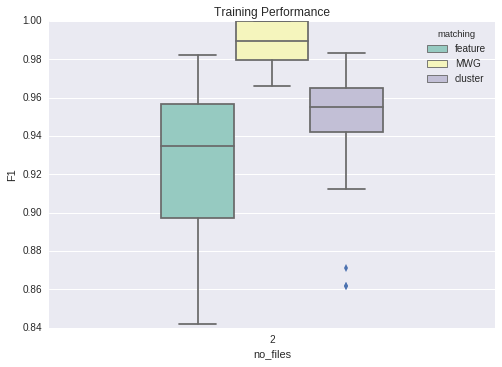

In [58]:
plot_training_boxplot()

In [72]:
item = exp_results_1c[1]
training_data, training_df, best_training_row, match_res = item
pd.set_option('display.max_rows', len(training_df))
display(training_df)
pd.reset_option('display.max_rows')    
print best_training_row

,mass_tol,rt_tol,TP,FP,FN,Prec,Rec,F1,Threshold,grouping_tol,matching_alpha
0,2,5,2,0.0,46,1,107,0.978723,0.300654,0.460000,1
1,2,5,2,0.2,53,3,100,0.946429,0.346405,0.507177,1
2,2,5,2,0.4,53,3,100,0.946429,0.346405,0.507177,1
3,2,5,2,0.6,53,3,100,0.946429,0.346405,0.507177,1
4,2,5,2,0.8,53,3,100,0.946429,0.346405,0.507177,1
5,2,5,2,1.0,53,3,100,0.946429,0.346405,0.507177,1
6,2,5,4,0.0,48,2,105,0.960000,0.313725,0.472906,1
7,2,5,4,0.2,53,3,100,0.946429,0.346405,0.507177,1
8,2,5,4,0.4,53,3,100,0.946429,0.346405,0.507177,1
9,2,5,4,0.6,53,3,100,0.946429,0.346405,0.507177,1


mass_tol                 2
rt_tol                   5
TP                       2
FP                       0
FN                      46
Prec                     1
Rec                    107
F1                0.978723
Threshold         0.300654
grouping_tol          0.46
matching_alpha           1
no_files                 2
matching               MWG
iter                     1
Name: 0, dtype: object


,mass_tol,rt_tol,TP,FP,FN,Prec,Rec,F1,Threshold,no_files,matching,iter
0,2,100,119,8,11,0.937008,0.915385,0.926070,1,2,feature,0
1,4,55,24,3,7,0.888889,0.774194,0.827586,1,2,feature,1
2,2,75,119,11,11,0.915385,0.915385,0.915385,1,2,feature,2
3,2,25,135,4,21,0.971223,0.865385,0.915254,1,2,feature,3
4,6,60,29,3,5,0.906250,0.852941,0.878788,1,2,feature,4
5,2,70,28,3,3,0.903226,0.903226,0.903226,1,2,feature,5
6,2,35,116,10,17,0.920635,0.872180,0.895753,1,2,feature,6
7,6,70,144,4,4,0.972973,0.972973,0.972973,1,2,feature,7
8,2,65,132,4,3,0.970588,0.977778,0.974170,1,2,feature,8
9,2,35,146,8,27,0.948052,0.843931,0.892966,1,2,feature,9


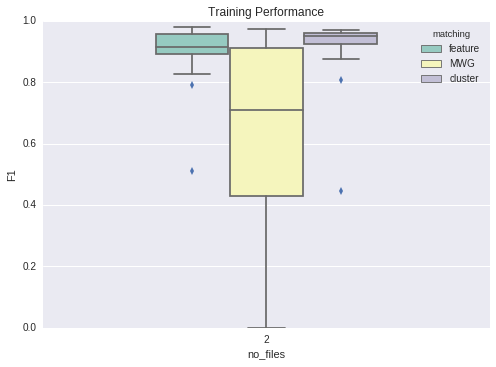

In [66]:
plot_testing_boxplot()

<hr/>

In [ ]:
def plot_scatter(exp_res, idx, df, title):
    item = exp_res[idx]
    training_data, training_df, best_training_row, match_res = item
    training_df = training_df.reset_index(drop=True)
    g = sns.JointGrid(x="Rec", y="Prec", data=training_df)
    g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
    plt.figure(g.fig.number)
    plt.plot(df.Rec, df.Prec, '.r-')    
    # g = g.plot_marginals(sns.distplot, kde=False, color=".5")  
    g = g.plot_marginals(sns.kdeplot, shade=True)
    ax = g.ax_joint
    ax.set_xlabel('Rec')
    ax.set_ylabel('Prec')
    ax.set_ylim([0.7, 1.0])
    ax = g.ax_marg_x
    ax.set_title(title)    

In [ ]:
plot_scatter(exp_results_3b, 0, df1, 'Cluster matching -- set 1')

In [ ]:
plot_scatter(exp_results_3b, 1, df2, 'Cluster matching -- set 2')

In [ ]:
plot_scatter(exp_results_3b, 2, df3, 'Cluster matching -- set 3')